In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("ReidentificationTests.csv")

In [4]:
def filterData(df: pd.DataFrame, query: str) -> pd.DataFrame:
    return df.query(query, inplace = False)

def stringToLst(string: str) -> list:
    return list(
        map( lambda x: float(x)*100, string.split(","))
    )

def displayCMC(df: pd.DataFrame, title: str, probe_places: str, gallery_places: str):
    print(title)
    print("[ ### Probe: %s - Gallery: %s  ###]" %(probe_places, gallery_places))
    print(set(df['Identification_Model'][:]))
    for model in set(df['Identification_Model'][:]):
        df_model = filterData(df,
        'Identification_Model == "%s" and Probe_place == "%s" '
        'and Gallery_place == "%s"' % (model, probe_places, gallery_places))
        for index in range(len(df_model)):
            colum: pd.DataFrame = df_model.iloc[index]
            label: str = colum['Metric']
            cmc = stringToLst(colum['Values'])
            plt.plot(cmc, label = label)
            plt.xlabel("Posiciones de la calificación")
            plt.ylabel("Precisión (%)")
            plt.grid(True)
            plt.legend(loc='lower right')
            plt.title("model: %s | Probe: %s - Gallery: %s" %(model, probe_places, gallery_places))
        plt.show()
        print(model)
        print(df_model[['Metric', 'mAP']])

def plotCMC(df, query, title, probe_places: str = 'ParqueSur', gallery_places: str = 'Ayagaures'):
    dataFilter = filterData(df, query)
    displayCMC(dataFilter, title, probe_places, gallery_places)

## RetinaFace

RetinaFace
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'DeepFace', 'VGG-Face', 'Facenet', 'OpenFace'}
DeepFace
           Metric       mAP
188        cosine  0.043601
189     euclidean  0.048643
190  euclidean_l2  0.043601
VGG-Face
           Metric       mAP
84         cosine  0.043252
103     euclidean  0.042238
154  euclidean_l2  0.043252
Facenet
           Metric       mAP
155        cosine  0.037070
156     euclidean  0.037089
157  euclidean_l2  0.037070
OpenFace
           Metric       mAP
158        cosine  0.047089
159     euclidean  0.047089
160  euclidean_l2  0.047089


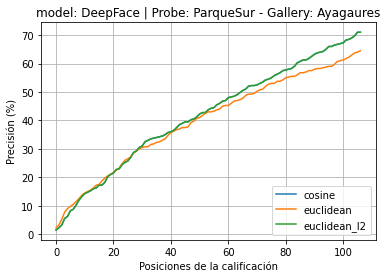

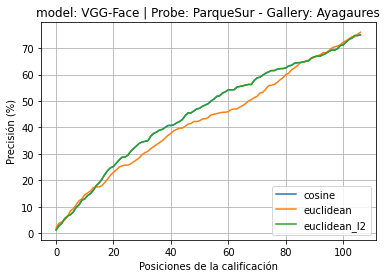

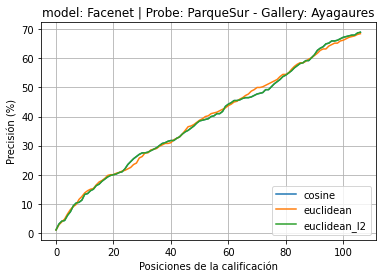

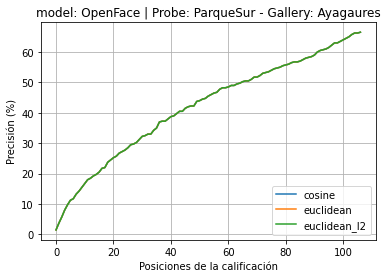

In [5]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace")

RetinaFace
[ ### Probe: Arucas - Gallery: Teror  ###]
{'DeepFace', 'VGG-Face', 'Facenet', 'OpenFace'}
DeepFace
           Metric       mAP
251        cosine  0.033147
252     euclidean  0.030934
253  euclidean_l2  0.033147
VGG-Face
           Metric       mAP
80         cosine  0.040424
98      euclidean  0.033853
117  euclidean_l2  0.040424
Facenet
           Metric       mAP
245        cosine  0.026636
246     euclidean  0.026832
247  euclidean_l2  0.026636
OpenFace
           Metric       mAP
248        cosine  0.032068
249     euclidean  0.032068
250  euclidean_l2  0.032068


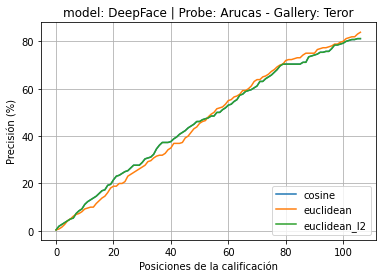

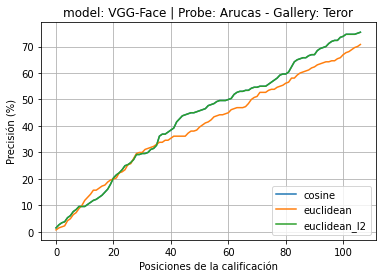

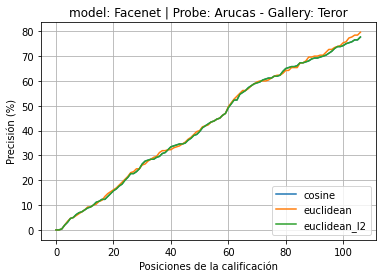

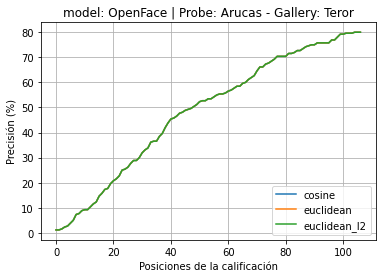

In [6]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "none"', "RetinaFace", 'Arucas','Teror')

RetinaFace + recorte
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'DeepFace', 'VGG-Face', 'Facenet', 'OpenFace'}
DeepFace
           Metric      mAP
191        cosine  0.06134
192     euclidean  0.07621
193  euclidean_l2  0.06134
VGG-Face
           Metric       mAP
161        cosine  0.057173
162     euclidean  0.058810
163  euclidean_l2  0.057173
Facenet
           Metric       mAP
164        cosine  0.032129
165     euclidean  0.032026
166  euclidean_l2  0.032129
OpenFace
           Metric       mAP
167        cosine  0.048084
168     euclidean  0.048084
169  euclidean_l2  0.048084


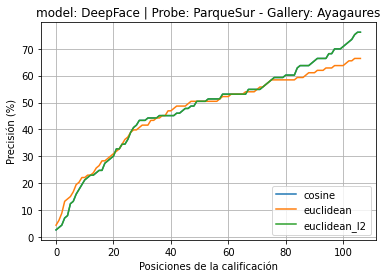

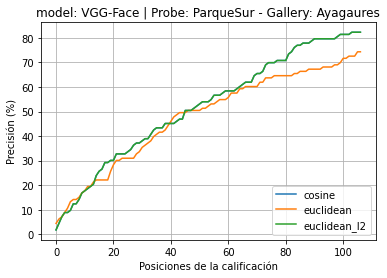

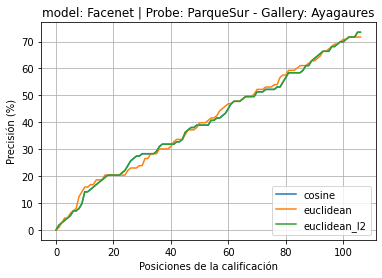

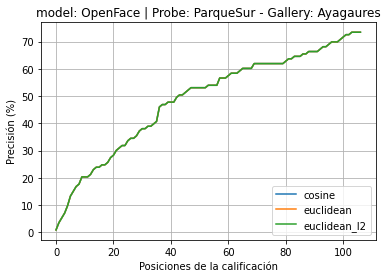

In [7]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte")

RetinaFace + recorte
[ ### Probe: Arucas - Gallery: Teror  ###]
{'DeepFace', 'VGG-Face', 'Facenet', 'OpenFace'}
DeepFace
           Metric       mAP
263        cosine  0.039073
264     euclidean  0.027331
265  euclidean_l2  0.039073
VGG-Face
           Metric       mAP
254        cosine  0.051493
255     euclidean  0.044584
256  euclidean_l2  0.051493
Facenet
           Metric       mAP
257        cosine  0.026430
258     euclidean  0.026661
259  euclidean_l2  0.026430
OpenFace
           Metric       mAP
260        cosine  0.038227
261     euclidean  0.038227
262  euclidean_l2  0.038227


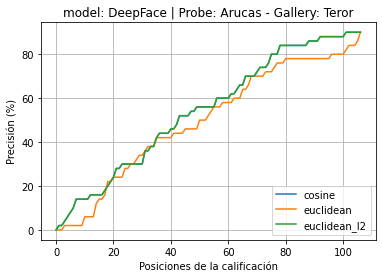

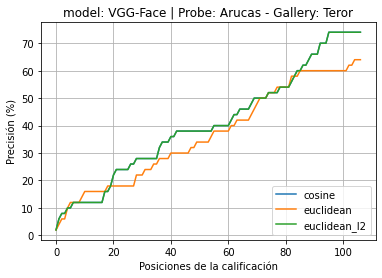

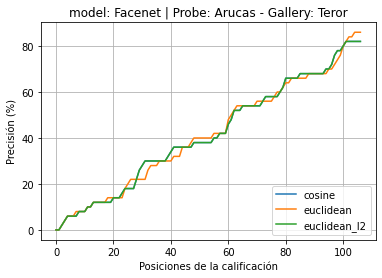

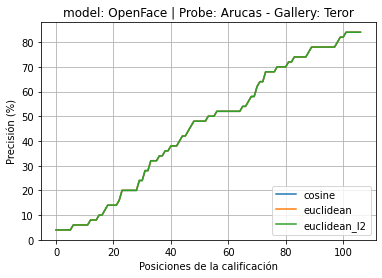

In [8]:
plotCMC(data, 'Face_Model == "retinaface" and Heuristics == "dimension"', "RetinaFace + recorte", 'Arucas','Teror')

## Img2pose

Img2pose
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'DeepFace', 'VGG-Face', 'Facenet', 'OpenFace'}
DeepFace
           Metric       mAP
194        cosine  0.047600
195     euclidean  0.047102
196  euclidean_l2  0.047667
VGG-Face
           Metric       mAP
170        cosine  0.055467
171     euclidean  0.048899
172  euclidean_l2  0.055467
Facenet
           Metric       mAP
173        cosine  0.048316
174     euclidean  0.048644
175  euclidean_l2  0.048316
OpenFace
           Metric      mAP
176        cosine  0.04193
177     euclidean  0.04193
178  euclidean_l2  0.04193


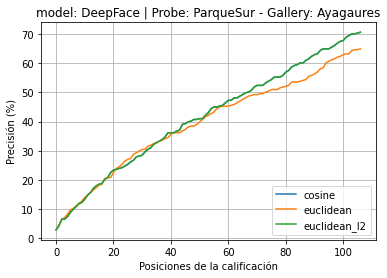

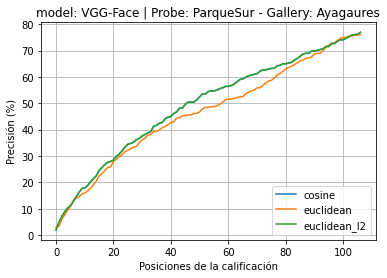

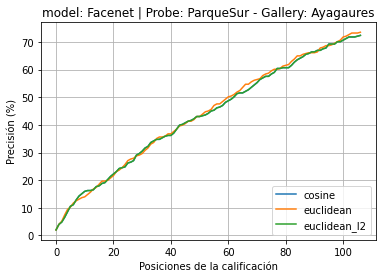

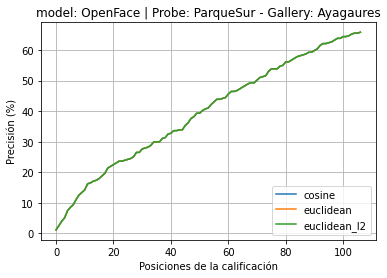

In [9]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose")

Img2pose
[ ### Probe: Arucas - Gallery: Teror  ###]
{'DeepFace', 'VGG-Face', 'Facenet', 'OpenFace'}
DeepFace
           Metric       mAP
275        cosine  0.035948
276     euclidean  0.031781
277  euclidean_l2  0.035948
VGG-Face
           Metric       mAP
266        cosine  0.042208
267     euclidean  0.043002
268  euclidean_l2  0.042209
Facenet
           Metric       mAP
269        cosine  0.029330
270     euclidean  0.029115
271  euclidean_l2  0.029330
OpenFace
           Metric      mAP
272        cosine  0.03089
273     euclidean  0.03089
274  euclidean_l2  0.03089


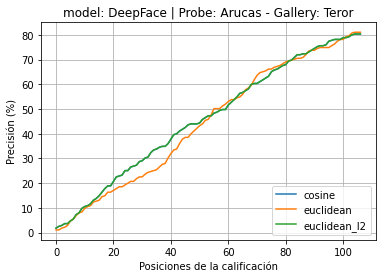

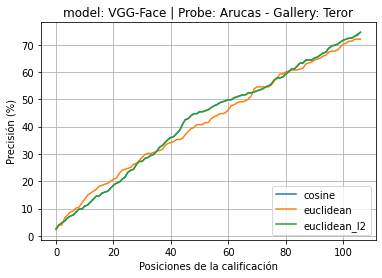

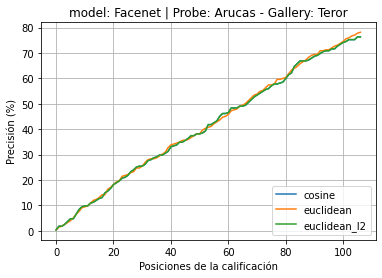

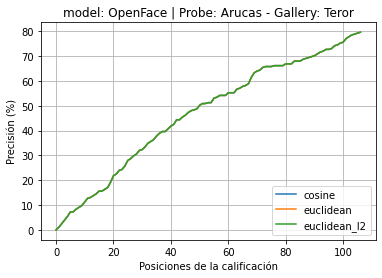

In [10]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "none"', "Img2pose", 'Arucas','Teror')

Img2pose + recorte de imagenes
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'DeepFace', 'VGG-Face', 'Facenet', 'OpenFace'}
DeepFace
           Metric       mAP
197        cosine  0.061397
198     euclidean  0.063752
199  euclidean_l2  0.061397
VGG-Face
           Metric       mAP
179        cosine  0.075071
180     euclidean  0.061801
181  euclidean_l2  0.075071
Facenet
           Metric       mAP
182        cosine  0.051394
183     euclidean  0.051122
184  euclidean_l2  0.051394
OpenFace
           Metric       mAP
185        cosine  0.041816
186     euclidean  0.041816
187  euclidean_l2  0.041816


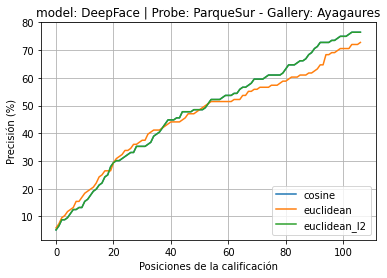

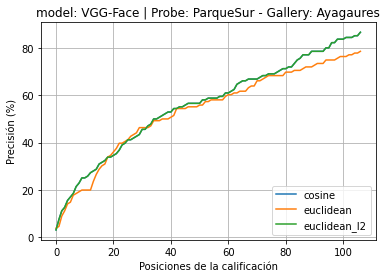

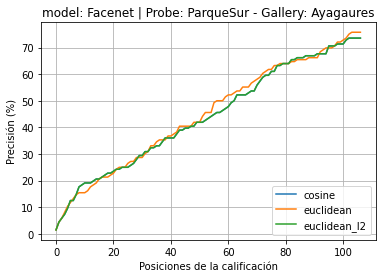

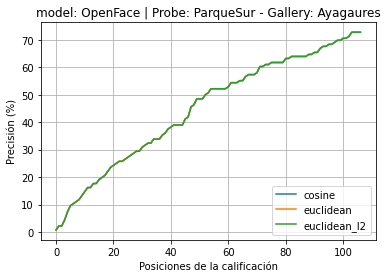

In [11]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes")

Img2pose + recorte de imagenes
[ ### Probe: Arucas - Gallery: Teror  ###]
{'DeepFace', 'VGG-Face', 'Facenet', 'OpenFace'}
DeepFace
           Metric       mAP
287        cosine  0.036759
288     euclidean  0.028864
289  euclidean_l2  0.036759
VGG-Face
           Metric       mAP
278        cosine  0.062431
279     euclidean  0.061314
280  euclidean_l2  0.062431
Facenet
           Metric       mAP
281        cosine  0.024543
282     euclidean  0.024937
283  euclidean_l2  0.024543
OpenFace
           Metric       mAP
284        cosine  0.038611
285     euclidean  0.038611
286  euclidean_l2  0.038611


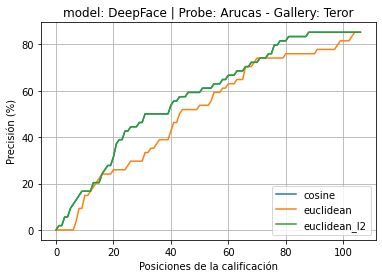

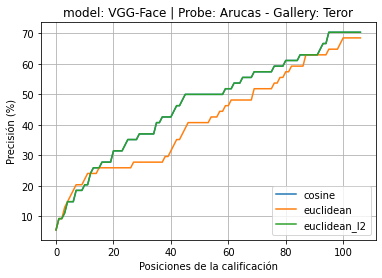

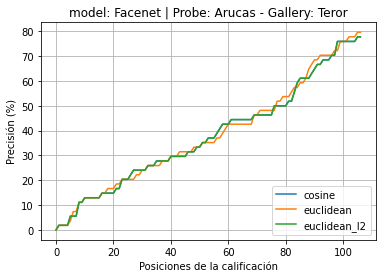

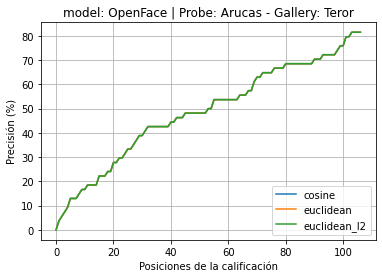

In [12]:
plotCMC(data, 'Face_Model == "img2pose" and Heuristics == "dimension"', "Img2pose + recorte de imagenes", 'Arucas','Teror')

## Aligned

### De dia

AlignedReId
[ ### Probe: ParqueSur - Gallery: Ayagaures  ###]
{'ResNet50'}
ResNet50
             Metric       mAP
12           cosine  0.009251
30        euclidean  0.460601
290      re-ranking  0.448509
292  euclidean+ pca  0.053101


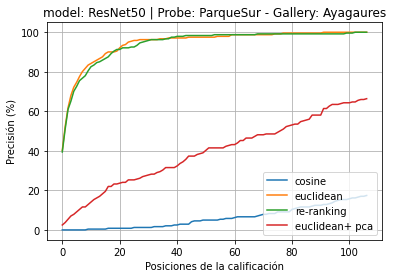

In [35]:
plotCMC(data, 'Face_Model == "AlignedReId"', "AlignedReId")

### Noche

AlignedReId
[ ### Probe: Arucas - Gallery: Teror  ###]
{'ResNet50'}
ResNet50
         Metric       mAP
8        cosine  0.016733
26    euclidean  0.202707
291  re-ranking  0.194772


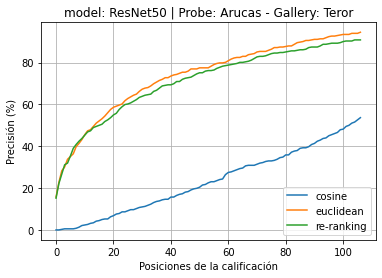

In [14]:
plotCMC(data, 'Face_Model == "AlignedReId"', "AlignedReId", 'Arucas','Teror')

4096
38


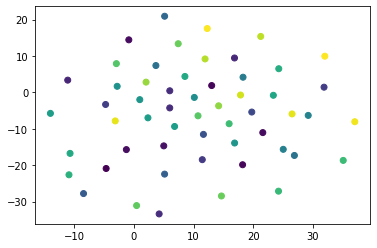

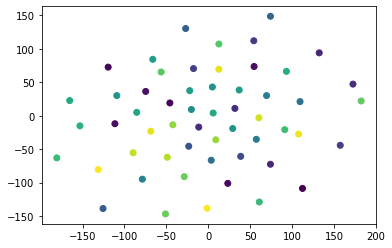

In [15]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from Utils.fileUtils import getNumber
import os

def TSNE_plot(data, classes):
  X_embedded = TSNE(n_components=2).fit_transform(data)
  plt.scatter(X_embedded[:,0], X_embedded[:,1], c = classes)
  plt.show()

pca = PCA(n_components=0.95)


with open('../data/Probe_faces_retinaface_dimension/PresaDeHornos/representations_deepface.pkl', 'rb') as f:
    data = pickle.load(f)

embedding = np.array([a[1]  for a in data])
embedding_pca = pca.fit_transform(embedding)
print(len(embedding[0]))
print(len(embedding_pca[0]))
runners = [getNumber(os.path.basename(a[0])) for a in data]
TSNE_plot(embedding, runners)

TSNE_plot(embedding_pca, runners)

(204, 8, 2048)
(204, 16384)
(204, 185)


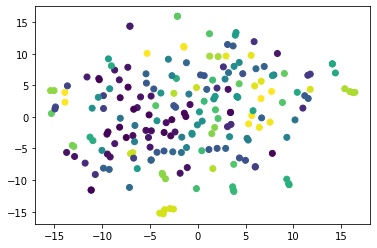

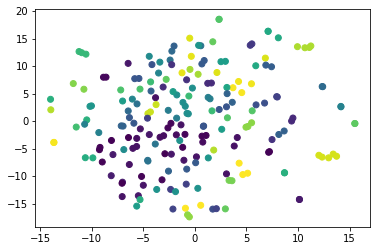

In [66]:
def print_embedding(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)

    embedding = np.array([a.embedding  for a in data.bodies])
    print(embedding.shape)
    if len(embedding.shape) > 2:
        embedding = embedding.reshape(-1, embedding.shape[1] * embedding.shape[2])
        print(embedding.shape)
    runners = [a.dorsal for a in data.bodies]
    TSNE_plot(embedding, runners)

def apply_pca(file):
    with open(file, 'rb') as f:
        data = pickle.load(f)
    pca = PCA(n_components=0.95)
    embedding = np.array([a.embedding for a in data.bodies])

    print(embedding[1])
    print(pca.fit_transform(embedding[1]))


#apply_pca('../data/TCG_alignedReId/ParqueSur.pkl')
print_embedding('../data/TCG_alignedReId/Ayagaures.pkl')
print_embedding('../data/TCG_alignedReId/Ayagaures_pca.pkl')


